# Importing Essential Libraries

In [104]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


In [105]:
normalized_database_filename = 'normalized.db'
conn = create_connection(normalized_database_filename, delete_db=True)

In [106]:
def create_train_table(normalized_database_filename='normalized.db'):
    f=open('crimetrain.csv','r')
    Date_time=[]
    Dates=[]
    Time=[]
    Category=[]
    Descript=[]
    Dayofweek=[]
    PdDistrict=[]
    Resolution=[]
    Address=[]
    X=[]
    Y=[]
    
    
    
   
    for i in f:
        a=i.split(",")
        Date_time.append(a[1])
        Category.append(a[2])
        Descript.append(a[3])
        Dayofweek.append(a[4])
        PdDistrict.append(a[5])
        Resolution.append(a[6])
        Address.append(a[7])
        X.append(a[8])
        Y.append(a[9])
    #print(Date_time[0])

    final_dates=Date_time[1:]
    
    for j in final_dates:
        b=j.split(" ")
        Dates.append(b[0])
        Time.append(b[1])
    #print(Dates[0])
    #print(Time[0])
    final_Category=Category[1:]
    final_Descript=Descript[1:]
    final_Dayofweek=Dayofweek[1:]
    final_PdDistrict=PdDistrict[1:]
    final_Resolution=Resolution[1:]
    final_Address=Address[1:]
    final_X=X[1:]
    final_Y=Y[1:]
    final_tuple=[]
    
    
    
    create_table(conn,"create table CrimeTable(ID INTEGER,Dates TEXT,Time TEXT,Category TEXT,Descript TEXT,DayofWeek TEXT,PdDistrict TEXT,Resolution TEXT,Address TEXT,X FLOAT,Y FLOAT ,PRIMARY KEY(ID))",drop_table_name='CrimeTable')
    
    for k in range(len(Category)-1):
        final_tuple.append((k+1,Dates[k],Time[k],final_Category[k],final_Descript[k],final_Dayofweek[k],final_PdDistrict[k],final_Resolution[k],final_Address[k],final_X[k],final_Y[k]))
    
    
    with conn:
        sql = """INSERT INTO CrimeTable
                  VALUES(?,?,?,?,?,?,?,?,?,?,?)"""
        cur = conn.cursor()
        cur.executemany(sql, final_tuple)
    #sql_statement = "select * from CrimeTable "
   # df = pd.read_sql_query(sql_statement, conn)
   # display(df)
   # conn.commit()
  

In [107]:
df=create_train_table(normalized_database_filename='normalized.db')

In [108]:
cnx = sqlite3.connect('normalized.db')

df = pd.read_sql_query("SELECT * FROM CrimeTable ", cnx)

In [109]:
df.head(5)

,ID,Dates,Time,Category,Descript,DayofWeek,PdDistrict,Resolution,Address,X,Y
0,1,2015-05-13,23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,ARREST/ BOOKED,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2,2015-05-13,23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,ARREST/ BOOKED,OAK ST / LAGUNA ST,-122.425892,37.774599
2,3,2015-05-13,23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,ARREST/ BOOKED,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,4,2015-05-13,23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5,2015-05-13,23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          878049 non-null  int64  
 1   Dates       878049 non-null  object 
 2   Time        878049 non-null  object 
 3   Category    878049 non-null  object 
 4   Descript    878049 non-null  object 
 5   DayofWeek   878049 non-null  object 
 6   PdDistrict  878049 non-null  object 
 7   Resolution  878049 non-null  object 
 8   Address     878049 non-null  object 
 9   X           878049 non-null  float64
 10  Y           878049 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 73.7+ MB


In [111]:
df.describe()

,ID,X,Y
count,878049.000000,878049.000000,878049.000000
mean,439025.000000,-122.422616,37.771020
std,253471.057592,0.030354,0.456893
min,1.000000,-122.513642,37.707879
25%,219513.000000,-122.432952,37.752427
50%,439025.000000,-122.416420,37.775421
75%,658537.000000,-122.406959,37.784369
max,878049.000000,-120.500000,90.000000


In [112]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']# finding numeric columns in dataset

newdf = df.select_dtypes(include=numerics)

In [113]:
df.isna().sum()#checking null values in dataset

ID            0
Dates         0
Time          0
Category      0
Descript      0
DayofWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [114]:
df.PdDistrict.unique()# finding the unique cities

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [115]:
crime_By_district=df.PdDistrict.value_counts()#No of crimes in each district 

<AxesSubplot:>

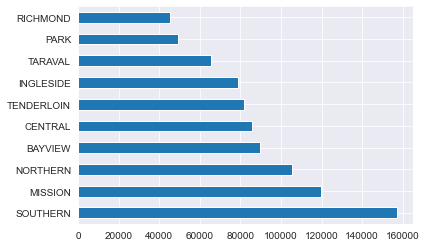

In [116]:
crime_By_district.plot(kind='barh')

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

<AxesSubplot:xlabel='PdDistrict', ylabel='Count'>

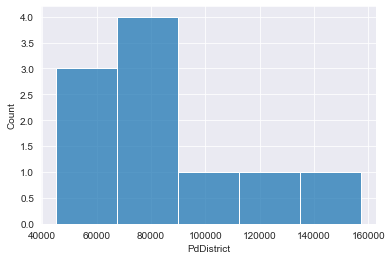

In [118]:
sns.histplot(crime_By_district)

In [119]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [120]:
crime_category=df['Category'].value_counts().head(25)

<AxesSubplot:>

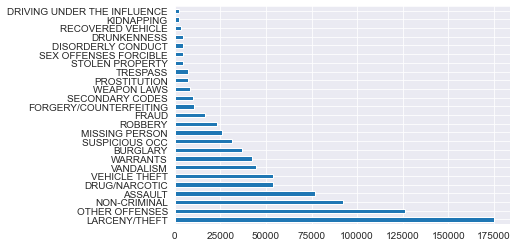

In [121]:
crime_category[0:25].plot(kind='barh')#most no of crimes

In [122]:
df['DayofWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayofWeek, dtype: int64

In [123]:
category_values=df['Category'].value_counts()
day_values=df['DayofWeek'].value_counts()

<AxesSubplot:>

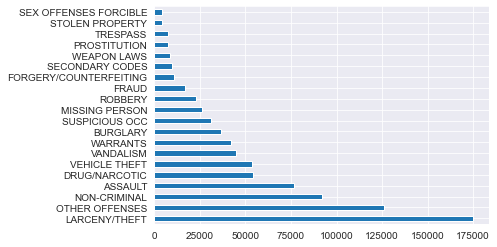

In [124]:
category_values[0:20].plot(kind='barh')

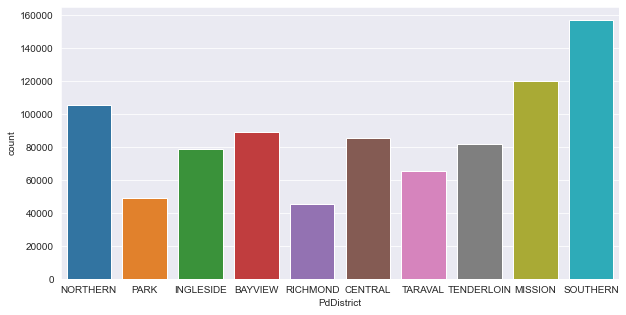

In [125]:
figure, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = df["PdDistrict"])
plt.show()

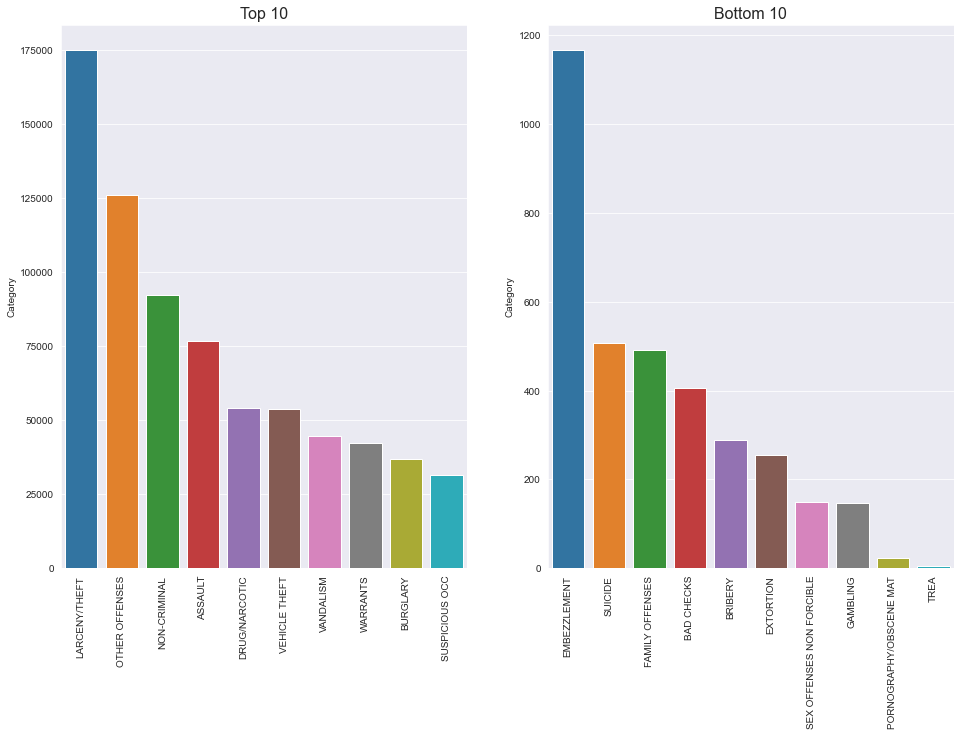

In [126]:
df_cr=pd.DataFrame(df['Category'].value_counts())
df_cr.tail()
plt.figure(figsize=(16,10))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10', size=16)
sns.barplot(x=df_cr.head(10).index, y='Category', data=df_cr.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10', size=16)
sns.barplot(x=df_cr.tail(10).index, y='Category', data=df_cr.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='PdDistrict'>

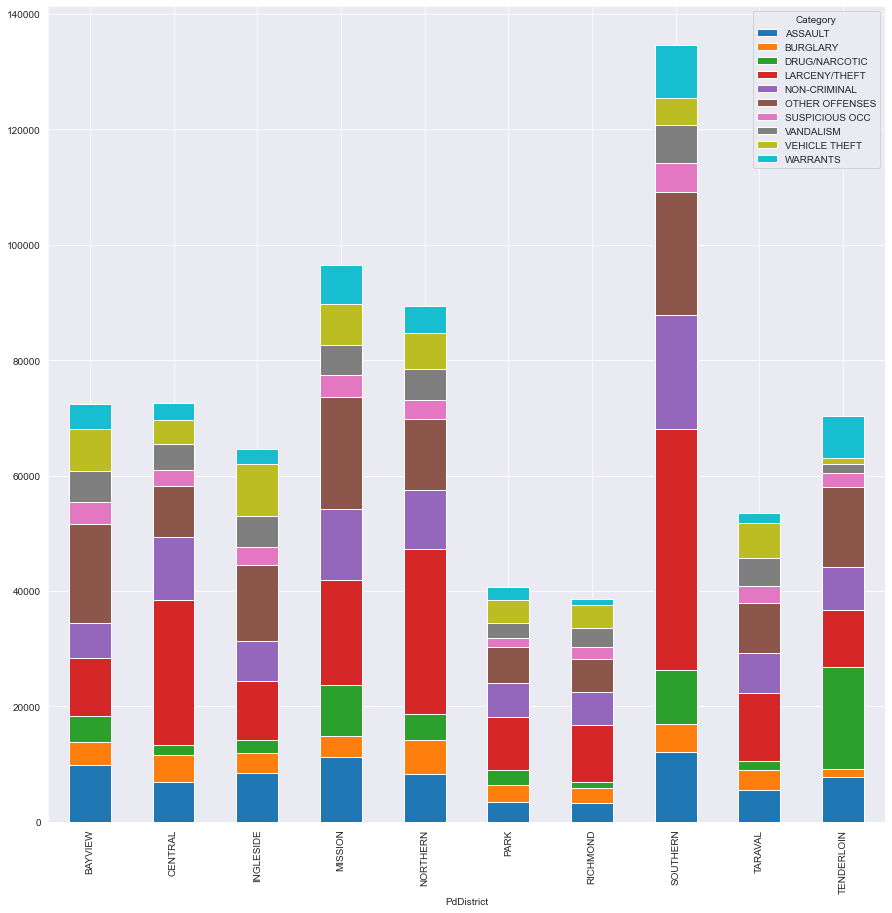

In [127]:
top10cc=pd.Series(df_cr.head(10).index)
top10=df[df['Category'].isin(top10cc)]
tmp=pd.DataFrame(top10.groupby(['PdDistrict','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='PdDistrict',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [128]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [129]:
test = pd.read_csv("test.csv",parse_dates = ['Dates'],index_col = 'Id')
train = pd.read_csv("train.csv",parse_dates = ['Dates'])

# Computing Null Values and Duplicates

In [130]:
#Function for printing null_values and related info
def description(data):
    no_rows=data.shape[0]
    types=data.dtypes
    col_null = data.columns[data.isna().any()].to_list()
    counts=data.apply(lambda x: x.count())
    uniques=data.apply(lambda x: x.unique())
    nulls=data.apply(lambda x: x.isnull().sum())
    distincts=data.apply(lambda x: x.unique().shape[0])
    nan_percent=(data.isnull().sum()/no_rows)*100
    cols={'dtypes':types, 'counts':counts, 'distincts':distincts, 'nulls':nulls,  
          'missing_percent':nan_percent, 'uniques':uniques}
    table=pd.DataFrame(data=cols)
    return table

In [131]:
#Checking Null Values In Train
details_tr = description(train)
details_tr.reset_index(level=[0],inplace =True)
details_tr.sort_values(by='missing_percent', ascending=False)

,index,dtypes,counts,distincts,nulls,missing_percent,uniques
0,Dates,datetime64[ns],878049,389257,0,0.0,"[2015-05-13T23:53:00.000000000, 2015-05-13T23:..."
1,Category,object,878049,39,0,0.0,"[WARRANTS, OTHER OFFENSES, LARCENY/THEFT, VEHI..."
2,Descript,object,878049,879,0,0.0,"[WARRANT ARREST, TRAFFIC VIOLATION ARREST, GRA..."
3,DayOfWeek,object,878049,7,0,0.0,"[Wednesday, Tuesday, Monday, Sunday, Saturday,..."
4,PdDistrict,object,878049,10,0,0.0,"[NORTHERN, PARK, INGLESIDE, BAYVIEW, RICHMOND,..."
5,Resolution,object,878049,17,0,0.0,"[ARREST, BOOKED, NONE, ARREST, CITED, PSYCHOPA..."
6,Address,object,878049,23228,0,0.0,"[OAK ST / LAGUNA ST, VANNESS AV / GREENWICH ST..."
7,X,float64,878049,34243,0,0.0,"[-122.425891675136, -122.42436302145, -122.426..."
8,Y,float64,878049,34243,0,0.0,"[37.7745985956747, 37.8004143219856, 37.800872..."


In [132]:
#Checking Null Values In Test
details_test = description(test)
details_test.reset_index(level=[0],inplace =True)
details_test.sort_values(by='missing_percent', ascending=False)

,index,dtypes,counts,distincts,nulls,missing_percent,uniques
0,Dates,datetime64[ns],884262,392173,0,0.0,"[2015-05-10T23:59:00.000000000, 2015-05-10T23:..."
1,DayOfWeek,object,884262,7,0,0.0,"[Sunday, Saturday, Friday, Thursday, Wednesday..."
2,PdDistrict,object,884262,10,0,0.0,"[BAYVIEW, NORTHERN, INGLESIDE, TARAVAL, MISSIO..."
3,Address,object,884262,23184,0,0.0,"[2000 Block of THOMAS AV, 3RD ST / REVERE AV, ..."
4,X,float64,884262,34346,0,0.0,"[-122.39958770418998, -122.391522893042, -122...."
5,Y,float64,884262,34346,0,0.0,"[37.7350510103906, 37.7324323864471, 37.792212..."


> **We can see that there are no NAN values in both the datasets**

* **We will check if the dataset contains any duplicate values**

In [133]:
train.duplicated().sum()

2323

# Checking For Outliers

<AxesSubplot:>

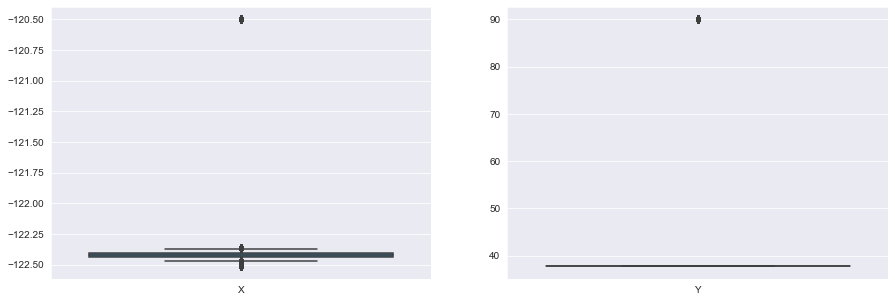

In [134]:
#Checking the outliers
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = train[["X"]],ax=axs[0])
sns.boxplot(data = train[["Y"]],ax=axs[1])



* **We can see there are outliers in X at -120.5 and Y at 90.0 so we will remove them in the next step**

In [135]:

train.drop_duplicates(inplace=True)
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

imp = SimpleImputer(strategy='mean')

for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict'] == district, ['X', 'Y']] = imp.fit_transform(
        train.loc[train['PdDistrict'] == district, ['X', 'Y']])
    test.loc[test['PdDistrict'] == district, ['X', 'Y']] = imp.transform(
        test.loc[test['PdDistrict'] == district, ['X', 'Y']])

* **Box Plot after removing outliers**

<AxesSubplot:>

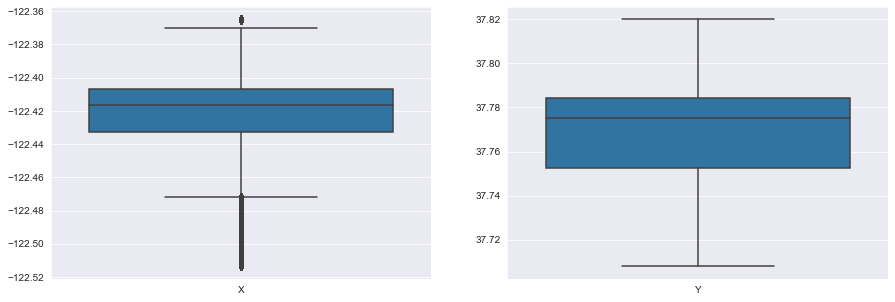

In [136]:
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = train[["X"]],ax=axs[0])
sns.boxplot(data = train[["Y"]],ax=axs[1])

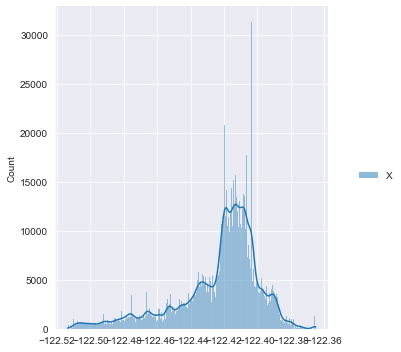

In [137]:
train = train[train["Y"] < 80]
sns.displot(train[["X"]],kde=True)
plt.show()

# Feature Engineering

In [138]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False).apply(lambda x: 1 if x == True else 0)
    data["X-Y"] = data["X"] - data["Y"]
    data["XY"] = data["X"] + data["Y"]
    data.drop(columns=['Dates','Date','Address'], inplace=True)
    return data
train = feature_engineering(train)
test = feature_engineering(test)
train.drop(columns=['Descript','Resolution'], inplace=True)

# Encoding

In [139]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
X = train.drop(columns=['Category'])
y= le2.fit_transform(train['Category'])

# Training the Model

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [141]:
#Fitting data in Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
#Predicting the results
predictions = dtree.predict(X_test)

In [143]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.03      0.04      0.04       138
           1       0.21      0.28      0.24      7628
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        25
           4       0.13      0.14      0.13      3651
           5       0.01      0.02      0.02       396
           6       0.03      0.04      0.03       211
           7       0.35      0.49      0.41      5344
           8       0.00      0.00      0.00       432
           9       0.02      0.02      0.02       128
          10       0.00      0.00      0.00        23
          11       0.02      0.02      0.02        45
          12       0.11      0.12      0.12      1058
          13       0.07      0.09      0.08      1632
          14       0.17      0.25      0.20        12
          15       0.05      0.06      0.05       236
          16       0.40      0.35      0.37     17512
          17       0.04    

In [144]:
#Fitting In RandomForest Ensemble
rfc = RandomForestClassifier(n_estimators=40,min_samples_split=100 )
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=40)

In [145]:
#Predicting The Final Results
rfc_pred = rfc.predict(X_test)
print ("Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, rfc_pred))


Train Accuracy:  0.37863333642072033
Test Accuracy:  0.31983602251835613


In [146]:
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.21      0.23      0.22      7628
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        25
           4       0.26      0.04      0.07      3651
           5       0.14      0.02      0.03       396
           6       0.00      0.00      0.00       211
           7       0.36      0.46      0.40      5344
           8       0.00      0.00      0.00       432
           9       0.00      0.00      0.00       128
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        45
          12       0.22      0.03      0.05      1058
          13       0.29      0.02      0.03      1632
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00       236
          16       0.34      0.77      0.47     17512
          17       0.80    

/Users/bhargavanudeepkoripalli/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhargavanudeepkoripalli/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhargavanudeepkoripalli/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

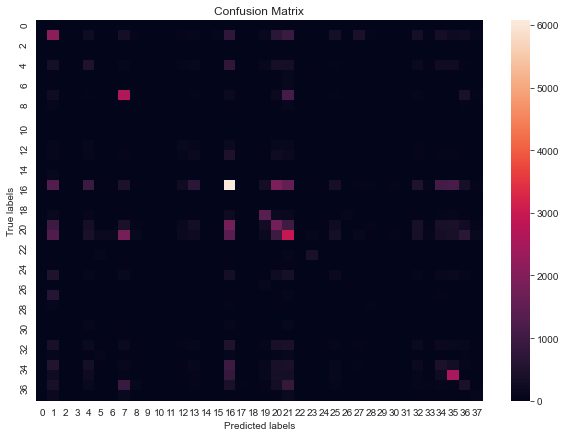

In [147]:
cm = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=False, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

> **Plotting feature importance in prediction*

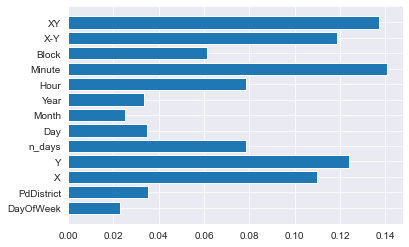

In [148]:
n_features = X.shape[1]
plt.barh(range(n_features),rfc.feature_importances_)
plt.yticks(np.arange(n_features),train.columns[1:])
plt.show()

# Submission

In [149]:
keys = le2.classes_
values = le2.transform(le2.classes_)
keys

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [150]:
dictionary = dict(zip(keys, values))
print(dictionary)

{'ARSON': 0, 'ASSAULT': 1, 'BAD CHECKS': 2, 'BRIBERY': 3, 'BURGLARY': 4, 'DISORDERLY CONDUCT': 5, 'DRIVING UNDER THE INFLUENCE': 6, 'DRUG/NARCOTIC': 7, 'DRUNKENNESS': 8, 'EMBEZZLEMENT': 9, 'EXTORTION': 10, 'FAMILY OFFENSES': 11, 'FORGERY/COUNTERFEITING': 12, 'FRAUD': 13, 'GAMBLING': 14, 'KIDNAPPING': 15, 'LARCENY/THEFT': 16, 'LIQUOR LAWS': 17, 'LOITERING': 18, 'MISSING PERSON': 19, 'NON-CRIMINAL': 20, 'OTHER OFFENSES': 21, 'PORNOGRAPHY/OBSCENE MAT': 22, 'PROSTITUTION': 23, 'RECOVERED VEHICLE': 24, 'ROBBERY': 25, 'RUNAWAY': 26, 'SECONDARY CODES': 27, 'SEX OFFENSES FORCIBLE': 28, 'SEX OFFENSES NON FORCIBLE': 29, 'STOLEN PROPERTY': 30, 'SUICIDE': 31, 'SUSPICIOUS OCC': 32, 'TREA': 33, 'TRESPASS': 34, 'VANDALISM': 35, 'VEHICLE THEFT': 36, 'WARRANTS': 37, 'WEAPON LAWS': 38}


In [151]:
y_pred_proba = rfc.predict_proba(test)
y_pred_proba

array([[0.01232945, 0.21601067, 0.        , ..., 0.0674093 , 0.04331862,
        0.035795  ],
       [0.00032004, 0.09488632, 0.        , ..., 0.01564704, 0.06252564,
        0.02383359],
       [0.005309  , 0.11306392, 0.        , ..., 0.03225903, 0.02377284,
        0.01624286],
       ...,
       [0.00146788, 0.08902528, 0.00572985, ..., 0.16919022, 0.02637813,
        0.00293204],
       [0.00935975, 0.15596875, 0.00547107, ..., 0.09514844, 0.02487694,
        0.00934517],
       [0.0004386 , 0.06480586, 0.00100574, ..., 0.17838145, 0.00217741,
        0.00422012]])

In [152]:
result = pd.DataFrame(y_pred_proba, columns=keys)
result.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.012329,0.216011,0.000000,0.004547,0.036838,0.002031,0.006531,0.024751,0.006027,0.000472,...,0.000000,0.008252,0.000168,0.088808,0.0,0.004538,0.052815,0.067409,0.043319,0.035795
1,0.000320,0.094886,0.000000,0.000000,0.001893,0.002857,0.034362,0.066638,0.002042,0.000000,...,0.000000,0.003262,0.000000,0.051889,0.0,0.000217,0.016985,0.015647,0.062526,0.023834
2,0.005309,0.113064,0.000000,0.000281,0.057445,0.002927,0.002791,0.021115,0.004556,0.000168,...,0.000000,0.005122,0.000000,0.044294,0.0,0.009652,0.047694,0.032259,0.023773,0.016243
3,0.000427,0.138180,0.000455,0.000678,0.021604,0.002569,0.002063,0.053390,0.007908,0.000000,...,0.000181,0.012637,0.000000,0.049728,0.0,0.008412,0.068330,0.087674,0.065789,0.031866
4,0.000427,0.138180,0.000455,0.000678,0.021604,0.002569,0.002063,0.053390,0.007908,0.000000,...,0.000181,0.012637,0.000000,0.049728,0.0,0.008412,0.068330,0.087674,0.065789,0.031866
